In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import rand_score

In [164]:
class KMeans:
    
    def __init__(self, n_clusters=8, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.cluster_centers_ = []
        self.labels_ = []
    
    def __compute_distance_matrix(self, X, cl):
        X_2 = np.sum(X**2, axis=1, keepdims=True)
        cl_2 = np.sum(cl**2, axis=1, keepdims=True)
        X_cl = np.matmul(X, cl.T)
        return np.sqrt(X_2 - 2*X_cl + cl_2.T)
    
    def __initialization__(self, X):
        maximum_values = np.amax(X, axis=0)
        minimum_values = np.amin(X, axis=0)
        self.cluster_centers_ = np.array([[np.random.randint(minimum_values[i], maximum_values[i]) for i in range(X.shape[1])] 
                                          for _ in range(self.n_clusters)])        
    
    def fit(self, X):
        self.__initialization__(X)
        n_iter = 0
        tol = np.inf
        while n_iter<self.max_iter and tol>self.tol:
            prev_centroids = self.cluster_centers_
            distance_matrix = self.__compute_distance_matrix(X, self.cluster_centers_)
            self.labels_ = np.argmin(distance_matrix, axis=1)
            for i in range(self.n_clusters):
                if len(X[self.labels_==i]):
                    self.cluster_centers_[i] = np.mean(X[self.labels_==i], axis=0)
            n_iter += 1
            tol = np.sqrt(np.sum((prev_centroids-self.cluster_centers_)**2))
    
    def predict(self, X):
        distance_matrix = self.__compute_distance_matrix(X, self.cluster_centers_)
        return np.argmin(distance_matrix, axis=1)

In [165]:
X, y = make_classification(n_samples=200, 
                           n_features=2, 
                           n_redundant=0, 
                           n_classes=3, 
                           n_clusters_per_class=1, 
                           random_state=5)

<AxesSubplot:>

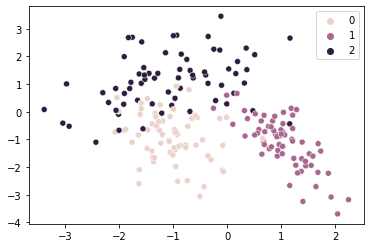

In [166]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
def get_score(n_clusters):    
    km = KMeans(n_clusters=n_clusters)
    km.fit(X_train)
    return rand_score(y_train, km.labels_)

In [169]:
results = {n_clusters: 1-get_score(n_clusters) for n_clusters in range(2, 11)}

<AxesSubplot:>

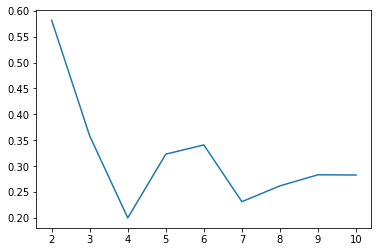

In [170]:
sns.lineplot(x=results.keys(), y=results.values())

<AxesSubplot:>

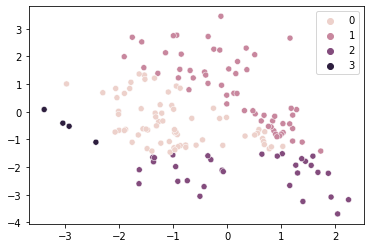

In [171]:
km = KMeans(n_clusters=4)
km.fit(X_train)
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=km.labels_)

In [172]:
rand_score(y_train, km.labels_)

0.6391509433962265

In [173]:
y_hat = km.predict(X_test)

In [174]:
rand_score(y_test, y_hat)

0.6641025641025641

<AxesSubplot:>

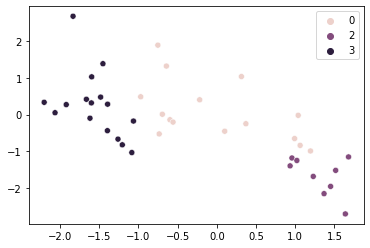

In [176]:
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_hat)